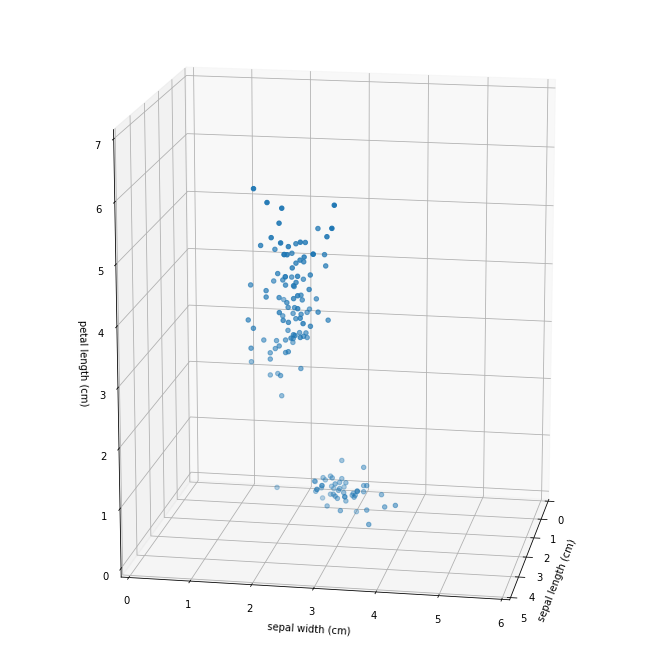

X_pca shape:(150, 2)
Explained variance ratio:[0.73, 0.229]



,0,1,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


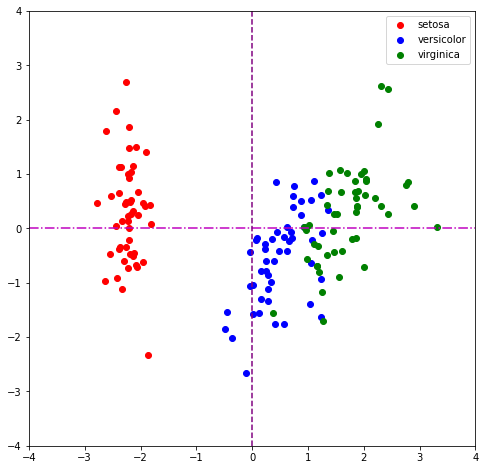

In [36]:
#AI-TECHGYM-1-6-Q-1
#教師なし学習 PCA

#データ加工・処理・分析ライブラリ
import pandas as pd

#可視化ライブラリ
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

#インポート
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#アヤメデータを読み込むためのインポート
from sklearn.datasets import load_iris

#アヤメのデータの取得
iris = load_iris()

df_iris = pd.DataFrame(iris.data) 
df_iris.columns = iris.feature_names

# display(df_iris)

x = df_iris.iloc[:,0]
y = df_iris.iloc[:,1]
z = df_iris.iloc[:,2]
# Axes3Dオブジェクトの生成
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111, projection="3d")

# 各種描画処理
xmax, xmin = 0,5
ymax, ymin = 0,6
zmax, zmin = 0,7

ax.set_xlim3d(xmin, xmax)
ax.set_ylim3d(ymin, ymax)
ax.set_zlim3d(zmin, zmax)

ax.set_xlabel(df_iris.columns[0])
ax.set_ylabel(df_iris.columns[1])
ax.set_zlabel(df_iris.columns[2])

ax.set_box_aspect((xmax-xmin,ymax-ymin,zmax-zmin))
ax.view_init(elev=15, azim=10)
# plt.axis('off')
ax.scatter(x, y, z)

# プロットの表示
plt.show()

# 標準化
sc = StandardScaler()
X_std = sc.fit_transform(iris.data)
# print(X_std)

# 主成分分析
pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

EVR = pca.explained_variance_ratio_
x = float(format(EVR[0], '.3f'))
y = float(format(EVR[1], '.3f'))

print('X_pca shape:{}'.format(X_pca.shape))
print('Explained variance ratio:{}'.format([x,y]))

print()

df_pca = pd.DataFrame(X_pca)
df_pca['target'] = iris.target

display(df_pca.head())

df0 = df_pca[df_pca.target == 0]
df1 = df_pca[df_pca.target == 1]
df2 = df_pca[df_pca.target == 2]

plt.figure(figsize=(8,8))
plt.xlim(-4,4)
plt.ylim(-4,4)
# y=0に水平線を引く
plt.axhline(0, ls = "-.", color = "m")
# x=0に垂直線を引く
plt.axvline(0, ls = "--", color = "purple")

plt.scatter(df0[0], df0[1], label='setosa', color='red')
plt.scatter(df1[0], df1[1], label='versicolor', color='blue')
plt.scatter(df2[0], df2[1], label='virginica', color='green')

plt.legend(loc='upper right')

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [33]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [34]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [89]:
sc = StandardScaler()
X_std = sc.fit_transform(cancer.data[:,0].reshape(-1,1))
print(X_std[:5])

[[ 1.09706398]
 [ 1.82982061]
 [ 1.57988811]
 [-0.76890929]
 [ 1.75029663]]


In [90]:
sc = StandardScaler()
X_std = sc.fit_transform(cancer.data)
print(X_std[:5])

[[ 1.09706398e+00 -2.07333501e+00  1.26993369e+00  9.84374905e-01
   1.56846633e+00  3.28351467e+00  2.65287398e+00  2.53247522e+00
   2.21751501e+00  2.25574689e+00  2.48973393e+00 -5.65265059e-01
   2.83303087e+00  2.48757756e+00 -2.14001647e-01  1.31686157e+00
   7.24026158e-01  6.60819941e-01  1.14875667e+00  9.07083081e-01
   1.88668963e+00 -1.35929347e+00  2.30360062e+00  2.00123749e+00
   1.30768627e+00  2.61666502e+00  2.10952635e+00  2.29607613e+00
   2.75062224e+00  1.93701461e+00]
 [ 1.82982061e+00 -3.53632408e-01  1.68595471e+00  1.90870825e+00
  -8.26962447e-01 -4.87071673e-01 -2.38458552e-02  5.48144156e-01
   1.39236330e-03 -8.68652457e-01  4.99254601e-01 -8.76243603e-01
   2.63326966e-01  7.42401948e-01 -6.05350847e-01 -6.92926270e-01
  -4.40780058e-01  2.60162067e-01 -8.05450380e-01 -9.94437403e-02
   1.80592744e+00 -3.69203222e-01  1.53512599e+00  1.89048899e+00
  -3.75611957e-01 -4.30444219e-01 -1.46748968e-01  1.08708430e+00
  -2.43889668e-01  2.81189987e-01]
 [ 1.5

In [49]:
#AI-TECHGYM-1-4-A-3
#教師なし学習 k-mean法

# データ加工・処理・分析ライブラリ
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# k-means法を使うためのインポート
from sklearn.cluster import KMeans

# データがあるurl の指定
file_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'

# データを取得して展開する
#対象データを読み込み
shoppers= pd.read_csv(file_url)

# データの列の絞り込み
shoppers_sub = shoppers[['Administrative_Duration','Informational_Duration','ProductRelated_Duration','Region','SpecialDay']]

# KMeansクラスの初期化
kmeans = KMeans(init='random', n_clusters=6, random_state=0)

# クラスターの重心を計算
kmeans.fit(shoppers_sub)

# クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(kmeans.labels_, name='cluster_number')

# 金融機関のデータにクラスター番号のデータを結合
shoppers_with_cluster = pd.concat([shoppers, labels], axis=1)

# 分割のための区切りを設定
bins = [0,0.2,0.4,0.6,0.8,1]

# 上の区切りをもとに金融機関のデータを分割し、qcut_age変数に各データの年齢層を設定
qcut_sp = pd.cut(shoppers_with_cluster.SpecialDay, bins, right=False)

# クラスタ番号と年齢層を結合
df = pd.concat([shoppers_with_cluster.cluster_number, qcut_sp], axis=1)

# クラスタ番号と年齢層を軸に集計し、年齢層を列に設定
cross_cluster_sp = df.groupby(['cluster_number', 'SpecialDay']).size().unstack().fillna(0)
display(cross_cluster_sp)

# 分割のための区切りを設定
bins_2 = [1,2,3,4,5,6,7,8,9]

# 上の区切りをもとに金融機関のデータを分割し、qcut_age変数に各データの年齢層を設定
qcut_r = pd.cut(shoppers_with_cluster.Region, bins_2, right=False, labels=[1,2,3,4,5,6,7,8])

# クラスタ番号と年齢層を結合
df = pd.concat([shoppers_with_cluster.cluster_number, qcut_r], axis=1)

# クラスタ番号と年齢層を軸に集計し、年齢層を列に設定
cross_cluster_r = df.groupby(['cluster_number', 'Region']).size().unstack().fillna(0)
display(cross_cluster_r)


SpecialDay,"[0.0, 0.2)","[0.2, 0.4)","[0.4, 0.6)","[0.6, 0.8)","[0.8, 1.0)"
cluster_number,,,,,
0,386,6,7,2,15
1,10,0,0,0,0
2,1096,9,28,26,20
3,2807,49,48,83,71
4,6657,114,159,240,218
5,123,0,1,0,1


Region,1,2,3,4,5,6,7,8
cluster_number,,,,,,,,
0,181,39,83,35,12,25,17,15
1,8,0,1,1,0,0,0,0
2,464,119,239,110,27,64,78,39
3,1145,302,616,302,79,212,207,120
4,2912,667,1444,727,196,500,453,260
5,70,9,20,7,4,4,6,0
